# Import libraries

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
import json
import numpy as np
from citipy import citipy
from scipy.stats import linregress
import datetime

# Generate random list for latitudes and longitudes

In [2]:
#Generate random list for latitudes and longitudes
np.random.seed(18)
latitude=[lat for lat in np.random.randint(-90,90,2000)]
longitude=[lon for lon in np.random.randint(-180,180,2000)]
latitude_and_Longitude = tuple(zip(latitude,longitude))

# Find Nearest City

In [3]:
#use citipy library to find the nearest city for all latitudes and longitudes
cities = []
countries = []

for lat, lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    city_name = city.city_name
    cities.append(city_name)
    countries.append(city.country_code)

## Generate Dataframe for all information

In [4]:
city_df = pd.DataFrame({'City': cities, 'Country': countries})
city_df = city_df.drop_duplicates(subset=['City'],keep='first')
city_df['Date']=""
city_df['Latitude'] = ''
city_df['Longitude'] = ''
city_df['Max Temperature (F)'] = ''
city_df['Humidity (%)'] = ''
city_df['Cloudiness (%)'] = ''
city_df['Wind Speed (mph)'] = ''
city_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,vardo,no,,,,,,,
1,vaini,to,,,,,,,
2,aguimes,es,,,,,,,
3,pisco,pe,,,,,,,
4,butaritari,ki,,,,,,,


## Perform Openweathermap API calls

In [5]:
for index, row in city_df.iterrows():
    city = row['City']
    country_code = row['Country']
    query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + \
                city + ',' + country_code + '&units=' + "imperial" + '&APPID=' + api_key
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    try:
        print(f"Retrieving Row {index}, City Name: {city}.")
        city_df.loc[index,'Date']=datetime.datetime.fromtimestamp(weather_json['dt'])
        city_df.loc[index,'Latitude']=weather_json['coord']['lat']
        city_df.loc[index,'Longitude']=weather_json['coord']['lon']
        city_df.loc[index,'Max Temperature (F)']=weather_json['main']['temp_max']
        city_df.loc[index, 'Humidity (%)']=weather_json['main']['humidity']
        city_df.loc[index, 'Cloudiness (%)']=weather_json['clouds']['all']
        city_df.loc[index, 'Wind Speed (mph)']=weather_json['wind']['speed']
        
    
    except:
        print(f"Oops, Record {index} city: {city} not found! ")

print("-----------------------------")        
print("Data Retrieval Complete!")

Retrieving Row 0, City Name: vardo.
Retrieving Row 1, City Name: vaini.
Retrieving Row 2, City Name: aguimes.
Retrieving Row 3, City Name: pisco.
Retrieving Row 4, City Name: butaritari.
Retrieving Row 5, City Name: albany.
Retrieving Row 6, City Name: cape town.
Retrieving Row 8, City Name: atuona.
Retrieving Row 9, City Name: isangel.
Retrieving Row 10, City Name: vanimo.
Retrieving Row 11, City Name: tarnow.
Retrieving Row 12, City Name: lebu.
Retrieving Row 13, City Name: new norfolk.
Retrieving Row 14, City Name: sungaipenuh.
Retrieving Row 15, City Name: mys shmidta.
Oops, Record 15 city: mys shmidta not found! 
Retrieving Row 16, City Name: utiroa.
Oops, Record 16 city: utiroa not found! 
Retrieving Row 17, City Name: hithadhoo.
Retrieving Row 18, City Name: norman wells.
Retrieving Row 19, City Name: port alfred.
Retrieving Row 20, City Name: rikitea.
Retrieving Row 21, City Name: namibe.
Retrieving Row 22, City Name: ushuaia.
Retrieving Row 23, City Name: yantal.
Retrieving Ro

Retrieving Row 305, City Name: angra.
Oops, Record 305 city: angra not found! 
Retrieving Row 308, City Name: black river.
Retrieving Row 312, City Name: bokajan.
Retrieving Row 315, City Name: saleaula.
Oops, Record 315 city: saleaula not found! 
Retrieving Row 316, City Name: banda aceh.
Retrieving Row 317, City Name: jiangyou.
Retrieving Row 318, City Name: parintins.
Retrieving Row 321, City Name: neiafu.
Retrieving Row 322, City Name: natal.
Retrieving Row 324, City Name: flinders.
Retrieving Row 326, City Name: suez.
Retrieving Row 327, City Name: cockburn town.
Retrieving Row 328, City Name: bambous virieux.
Retrieving Row 329, City Name: skjervoy.
Retrieving Row 336, City Name: guarapari.
Retrieving Row 341, City Name: coquimbo.
Retrieving Row 342, City Name: zachagansk.
Oops, Record 342 city: zachagansk not found! 
Retrieving Row 345, City Name: sitka.
Retrieving Row 346, City Name: evreux.
Retrieving Row 350, City Name: dikson.
Retrieving Row 355, City Name: ancud.
Retrieving

Retrieving Row 748, City Name: bonavista.
Retrieving Row 754, City Name: muros.
Retrieving Row 759, City Name: shobara.
Retrieving Row 763, City Name: putina.
Retrieving Row 764, City Name: nouadhibou.
Retrieving Row 765, City Name: paciran.
Retrieving Row 767, City Name: lashio.
Retrieving Row 771, City Name: gizo.
Retrieving Row 772, City Name: svetlogorsk.
Retrieving Row 779, City Name: yulara.
Retrieving Row 780, City Name: maragogi.
Retrieving Row 783, City Name: yurla.
Retrieving Row 784, City Name: nushki.
Retrieving Row 786, City Name: buala.
Retrieving Row 789, City Name: tenenkou.
Retrieving Row 795, City Name: belaya gora.
Retrieving Row 796, City Name: niksic.
Retrieving Row 797, City Name: bukachacha.
Retrieving Row 799, City Name: richards bay.
Retrieving Row 800, City Name: shimoda.
Retrieving Row 801, City Name: kourou.
Retrieving Row 805, City Name: makat.
Retrieving Row 809, City Name: college.
Retrieving Row 810, City Name: pontianak.
Retrieving Row 811, City Name: h

Retrieving Row 1270, City Name: visby.
Retrieving Row 1271, City Name: iskateley.
Retrieving Row 1273, City Name: conde.
Retrieving Row 1276, City Name: adrar.
Retrieving Row 1277, City Name: astana.
Retrieving Row 1289, City Name: knysna.
Retrieving Row 1290, City Name: atasu.
Retrieving Row 1293, City Name: yeletskiy.
Oops, Record 1293 city: yeletskiy not found! 
Retrieving Row 1295, City Name: susehri.
Retrieving Row 1297, City Name: barabinsk.
Retrieving Row 1299, City Name: san felipe.
Retrieving Row 1301, City Name: tukan.
Retrieving Row 1303, City Name: atbasar.
Retrieving Row 1304, City Name: barcelona.
Retrieving Row 1317, City Name: kuche.
Oops, Record 1317 city: kuche not found! 
Retrieving Row 1324, City Name: mentok.
Oops, Record 1324 city: mentok not found! 
Retrieving Row 1325, City Name: bokhan.
Retrieving Row 1326, City Name: wabana.
Retrieving Row 1327, City Name: vestmannaeyjar.
Retrieving Row 1333, City Name: srednekolymsk.
Retrieving Row 1335, City Name: cidreira.


Retrieving Row 1816, City Name: mokhsogollokh.
Retrieving Row 1817, City Name: oyama.
Retrieving Row 1820, City Name: longyan.
Retrieving Row 1822, City Name: mwene-ditu.
Retrieving Row 1824, City Name: tshikapa.
Retrieving Row 1827, City Name: thinadhoo.
Retrieving Row 1829, City Name: basco.
Retrieving Row 1846, City Name: sun city west.
Retrieving Row 1848, City Name: matay.
Retrieving Row 1854, City Name: ratnagiri.
Retrieving Row 1855, City Name: harper.
Retrieving Row 1860, City Name: garmsar.
Retrieving Row 1864, City Name: nongpoh.
Retrieving Row 1871, City Name: samusu.
Oops, Record 1871 city: samusu not found! 
Retrieving Row 1873, City Name: mae sai.
Retrieving Row 1878, City Name: iacu.
Retrieving Row 1879, City Name: bathurst.
Retrieving Row 1886, City Name: rabat.
Retrieving Row 1894, City Name: humaita.
Retrieving Row 1901, City Name: kita.
Retrieving Row 1905, City Name: seoul.
Retrieving Row 1907, City Name: singaraja.
Retrieving Row 1910, City Name: jiamusi.
Retrievin

In [6]:
#change all data recieved from openweathermap api to numerical data
city_df['Latitude'] = pd.to_numeric(city_df['Latitude'])
city_df['Longitude'] = pd.to_numeric(city_df['Longitude'])
city_df['Max Temperature (F)'] = pd.to_numeric(city_df['Max Temperature (F)'])
city_df['Humidity (%)'] = pd.to_numeric(city_df['Humidity (%)'])
city_df['Cloudiness (%)'] = pd.to_numeric(city_df['Cloudiness (%)'])
city_df['Wind Speed (mph)'] = pd.to_numeric(city_df['Wind Speed (mph)'])

In [7]:
#remove rows and columns with None values
new_city_df=city_df[city_df['Date'] != ""]
new_city_df.reset_index(inplace=True)
del new_city_df['index']
print("We have {} cities containing weather information.".format(len(new_city_df)))

We have 674 cities containing weather information.


### Export DataFrame to CSV File

In [8]:
new_city_df.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

#  Build scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

### Temperature (F) vs. Latitude

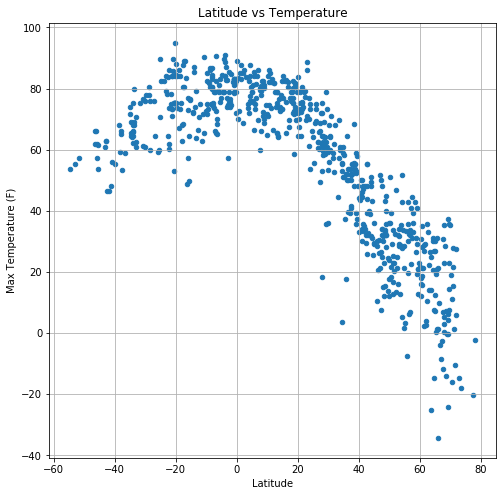

In [9]:
#Temperature (F) vs. Latitude
new_city_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", grid=True, figsize=(8,8),
              title="Latitude vs Temperature") 
plt.savefig("Latitude vs Temperature.jpeg")
plt.show()

#### The cities near the equator have higher temperatures and the cities which are far away from the equator have lower temperature.

### Humidity (%) vs. Latitude

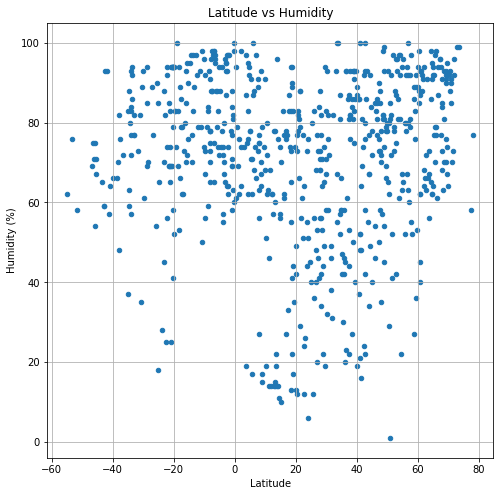

In [10]:
#Humidity (%) vs. Latitude
new_city_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", grid=True, figsize=(8,8),
              title="Latitude vs Humidity") 
plt.savefig("Latitude vs Humidity.jpeg")
plt.show()

#### It seems that there is no real pattern that can describe the relationship between latitude and humidity

### Cloudiness (%) vs. Latitude

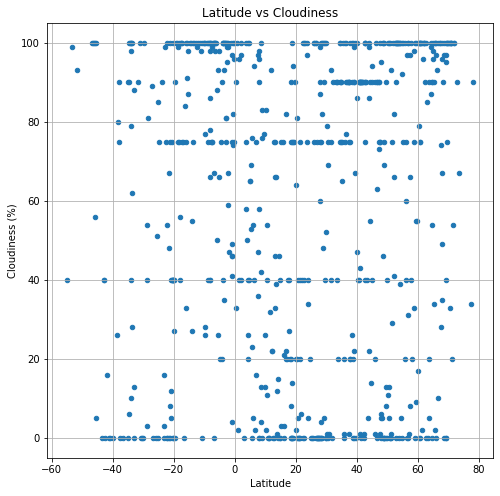

In [11]:
#Cloudiness (%) vs. Latitude
new_city_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", grid=True, figsize=(8,8),
              title="Latitude vs Cloudiness") 
plt.savefig("Latitude vs Cloudiness.jpeg")
plt.show()

#### It seems that there is no real pattern that can describe the relationship between latitude and Cloudiness

### Wind Speed (mph) vs. Latitude

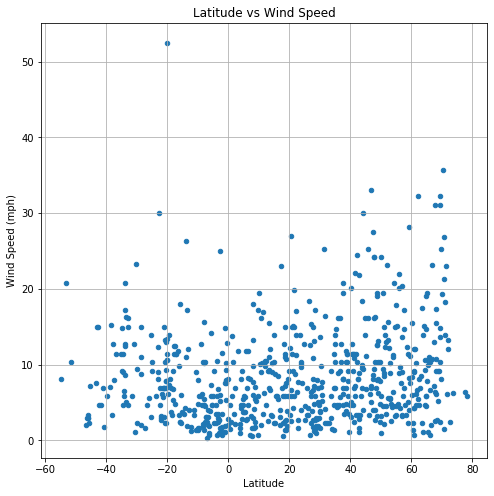

In [12]:
#Wind Speed (mph) vs. Latitude
new_city_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", grid=True, figsize=(8,8),
              title="Latitude vs Wind Speed") 
plt.savefig("Latitude vs Wind Speed.jpeg")
plt.show()

#### It seems that there is no real pattern that can describe the relationship between latitude and windspeed

## Perform linear regression on each relationship

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [13]:
Northern_Hemisphere=new_city_df[new_city_df['Latitude']>0]
Southern_Hemisphere=new_city_df[new_city_df['Latitude']<0]

Regression line equation is: y = -1.18x + 91.59
The r-squared is: -0.9
The regression displays a negative correlation.
In the Northern hemisphere, as the cities get closer to the equator, the temperature decreases.


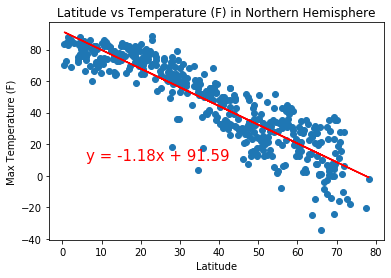

In [14]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x_values = Northern_Hemisphere['Latitude']
y_values = Northern_Hemisphere['Max Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs Temperature (F) in Northern Hemisphere")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression displays a negative correlation.")
print("In the Northern hemisphere, as the cities get closer to the equator, the temperature decreases.")
plt.savefig("Northern Hemisphere - Latitude vs Temperature (F).jpeg")
plt.show()

Regression line equation is: y = 0.44x + 82.04
The r-squared is: 0.59
The regression displays a positive correlation.
In the Southern hemisphere, as the cities get closer to the equator, the temperature increases.


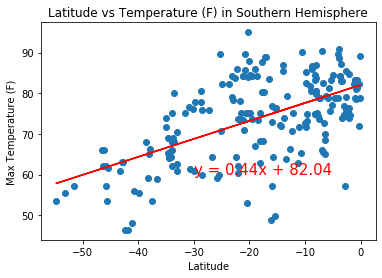

In [15]:
#Southern Hemisphere - Temperature (F) vs. Latitude
x_values = Southern_Hemisphere['Latitude']
y_values = Southern_Hemisphere['Max Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs Temperature (F) in Southern Hemisphere")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression displays a positive correlation.")
print("In the Southern hemisphere, as the cities get closer to the equator, the temperature increases.")
plt.savefig("Southern Hemisphere - Latitude vs Temperature (F).jpeg")
plt.show()

The r-squared is: 0.28
The regression is generally considered a None or Very weak relationship between latitude and humidity


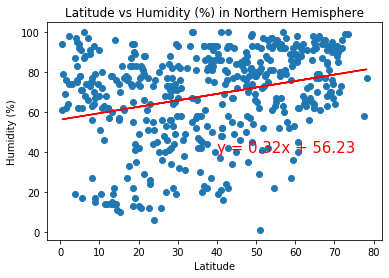

In [16]:
#Northern Hemisphere - Humidity (%) vs. Latitude
x_values = Northern_Hemisphere['Latitude']
y_values = Northern_Hemisphere['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity (%) in Northern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and humidity") 
plt.savefig("Northern Hemisphere - Latitude vs Humidity (%).jpeg")
plt.show()

The r-squared is: 0.25
The regression is generally considered a None or Very weak relationship between latitude and humidity


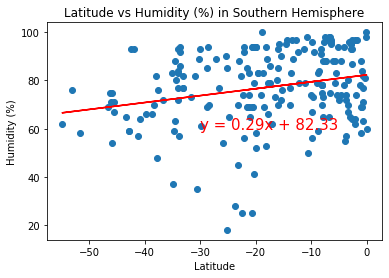

In [17]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_values = Southern_Hemisphere['Latitude']
y_values = Southern_Hemisphere['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity (%) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and humidity") 
plt.savefig("Southern Hemisphere - Latitude vs Humidity (%).jpeg")
plt.show()

The r-squared is: 0.23
The regression is generally considered a None or Very weak relationship between latitude and cloudiness


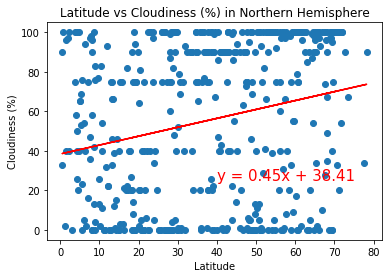

In [18]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = Northern_Hemisphere['Latitude']
y_values = Northern_Hemisphere['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness (%) in Northern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and cloudiness") 
plt.savefig("Northern Hemisphere - Latitude vs Cloudiness (%).jpeg")
plt.show()

The r-squared is: 0.28
The regression is generally considered a None or Very weak relationship between latitude and Cloudiness.


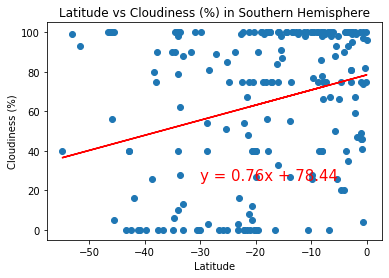

In [19]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = Southern_Hemisphere['Latitude']
y_values = Southern_Hemisphere['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness (%) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and Cloudiness.") 
plt.savefig("Southern Hemisphere - Latitude vs Cloudiness (%).jpeg")
plt.show()

The r-squared is: 0.25
The regression is generally considered a None or Very weak relationship between latitude and wind speed


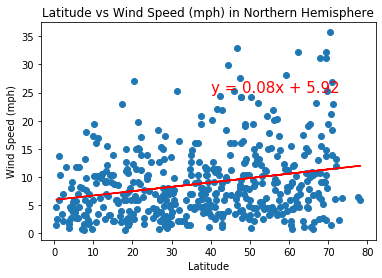

In [20]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = Northern_Hemisphere['Latitude']
y_values = Northern_Hemisphere['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed (mph) in Northern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and wind speed") 
plt.savefig("Northern Hemisphere - Latitude vs Wind Speed (mph).jpeg")
plt.show()

The r-squared is: -0.22
The regression is generally considered a None or Very weak relationship between latitude and wind speed


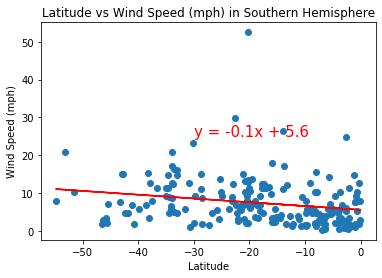

In [21]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = Southern_Hemisphere['Latitude']
y_values = Southern_Hemisphere['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed (mph) in Southern Hemisphere")
print(f"The r-squared is: {round(rvalue, 2)}")
print("The regression is generally considered a None or Very weak relationship between latitude and wind speed") 
plt.savefig("Southern Hemisphere - Latitude vs Wind Speed (mph).jpeg")
plt.show()

# Observations

* Temperature has a strong correlation with the latitude. Temperature decreases as latitude moves away from equator.
* There is no relationship between latitude and humidity. 
* Although not obvious, there is a weak linear relationship between cloundiness and latitude in Southern Hemisphere: As latitute increases, cloudiness increases.